In [1]:
# 3-2 의 과소적합을 해결하고 주어진 데이터를 모두 사용하기

#### 다중회귀: 여러 개의 특성을 사용한 선형회귀

- 1개의 특성을 사용했을 때 : 직선의 모델을 학습
- 2개의 특성을 사용했을 때 : 평면의 모델을 학습
- 3차 이상부터는 명시적으로 표현불가 (많은 특성을 사용할수록 매우 복잡한 모델을 표현할 수 있다.)
  
    
      
#### 특성공학: 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업
- 각 특성을 서로 곱해서 또 다른 특성을 만든다.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso



## 한글 사용을 위한 페키지##
import matplotlib as mpl
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
############################

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [3]:
# pandas데이터 분석 ㅏ이브러리로 csv(콤마로 이루어진 텍스트파일)를 dataframe으로 바꾸기
df = pd.read_csv('https://bit.ly/perch_csv_data')   # pandas 라이브러리의 read_csv함수로 csv파일을 dataframe으로 읽어오기
perch_full = df.to_numpy()                          # 읽어온 dataframe을 to_numpy()함수를 이용하여 넘파이배열로 바꾸기
print('input_data\n',perch_full)
print()

# target_data 준비
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

# trainset과 testset으로 나누기
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)

input_data
 [[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 

#### 변환기 : 특성을 만들거나 전처리하기 위한 다양한 클래스
- fit함수 : 새홉게 만들 특성 조합을 찾기
- transform함수 : 실제로 데이터를 변환
- ex) PloynomialFeatures, StandardScaler

In [4]:
# polynomialfeatures로 데이터 변환하기(길이,높이,두께)
poly = PolynomialFeatures(include_bias = False)    
# include_bias 파라미터 : 기본값은 True이고, 절편을 위한 항을 생성한다.(intercept의 1)
# 사이킷런 모델은 자동으로 특성에 추가된 절편 항을 무시하므로 명시적으로 False로 지정
poly.fit(train_input)
train_poly = poly.transform(train_input)
print('변환된 데이터의 shape:',train_poly.shape)
print('변환기가 변환한 조합:',poly.get_feature_names_out()) # 기본적으로 제곱항 형태로 변환됨
test_poly = poly.transform(test_input)
# testset은 반드시 습관적으로 trainset에 적용했던 변환기로 변환

변환된 데이터의 shape: (42, 9)
변환기가 변환한 조합: ['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


In [5]:
lr = LinearRegression() # 추정기
lr.fit(train_poly, train_target)
print('trainset_score:',lr.score(train_poly, train_target))
print('testset_score:',lr.score(test_poly,test_target))

trainset_score: 0.9903183436982124
testset_score: 0.9714559911594134


In [6]:
# 특성을 더 늘려서 score점수를 높여보기
poly = PolynomialFeatures(degree=5, include_bias=False)  # degree 파라미터: 5제곱항까지 특성을 만듬
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print('변환된 특성의 shape',train_poly.shape)
print()
lr.fit(train_poly,train_target)
print('trainset_score:',lr.score(train_poly, train_target)) # 완벽한 score
print('testset_score:',lr.score(test_poly, test_target))    # test점수 개망함
# 샘플개수보다 특성이 많음
# 특성이 많을수록 너무 과대적합되기 때문에 testset예측을 제대로 할 수가 없다.

변환된 특성의 shape (42, 55)

trainset_score: 0.9999999999991097
testset_score: -144.40579242684848


In [7]:
# 특성의 스케일이 정규화되지 않으면 곱해지는 계수의 값이 공정하지 못하게 됨
# 정규화하기
ss = StandardScaler()                      # StandardScaler : 자동으로 정규화해주는 클래스
ss.fit(train_poly)                         # 변환기
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

#lr.fit(train_scaled,train_scaled)                             
#print('trainset_score:',lr.score(train_scaled, train_scaled))  # trainset_score: 1.0
#print('testset_score:',lr.score(test_scaled, test_scaled))     # testset_score: 0.9999999998250597
# 과대적합해결??????????, 데이터수가 너무 작고 데이터 하나하나 모두 표준형이라서???

#### 규제 : 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것(과대적합방지)
- 릿지와 라쏘(규제클래스) : 선형 회귀 모델에 규제를 추가한 모델 (계수의 크기를 줄이는 역할, 라쏘는 계수를 아예 0으로 만드는 것이 가능)
 - 릿지 : 계수를 제곱한 값을 기준으로 규제를 적용, 성능이 더 좋다
 - 라쏘 : 계수의 절댓값을 기준으로 규제를 적용

In [8]:
# 릿지회귀
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print('trainset_score:',ridge.score(train_scaled, train_target))
print('testset_score:',ridge.score(test_scaled, test_target))

trainset_score: 0.9896101671037343
testset_score: 0.9790693977615391


In [9]:
# 릿지의 최적 alpha 하이퍼파라미터 값을 명시적으로 찾기
# 하이퍼파라미터 : 모델이 학습하는 값이 아니라 사전에 우리가 지정해야 하는 값
# alpha : 값이 작을수록 계수를 줄이는 역할이 줄어든다, 규제의 정도가 줄어든다

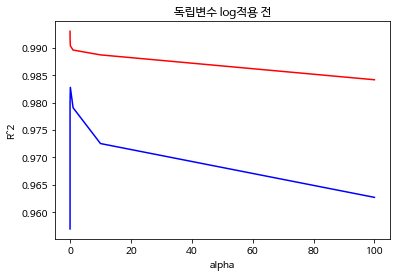

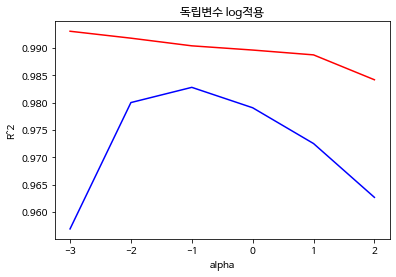

In [12]:
# score비교 방법으로 최적 alpha값을 찾기
train_score = []
test_score = []

# 각 alpha값 별로 릿지모델을 만들고 scorelist를 만들기
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score. append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

# 그래프그리기(alpha_list끼리의 독립변수 차이가 많이나서 그래프가 명시적으로 불완전)
plt.plot((alpha_list), train_score, color = 'r')
plt.plot((alpha_list),test_score, color = 'b')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('독립변수 log적용 전')
plt.show()
print()

plt.plot(np.log10(alpha_list), train_score,color = 'r')
plt.plot(np.log10(alpha_list),test_score,color = 'b')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('독립변수 log적용')
plt.show()
# -1에서 두 그래프가 가장 가깝고, 테스트 세트의 점수가 높다. (최적 alpha = 0.1)

In [11]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print('trainset_score:',ridge.score(train_scaled, train_target))
print('testset_score:',ridge.score(test_scaled, test_target))
# alpha찾기 전
#trainset_score: 0.9896101671037343
#testset_score: 0.9790693977615391

trainset_score: 0.9903815817570365
testset_score: 0.9827976465386884


In [12]:
# 라쏘회귀
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('trainset_score:',lasso.score(train_scaled, train_target))
print('testset_score:',lasso.score(test_scaled, test_target))

trainset_score: 0.989789897208096
testset_score: 0.9800593698421883


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.263e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


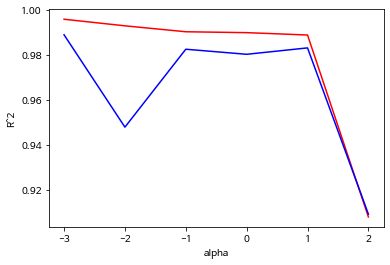

In [13]:
train_score = []
test_score = []

# 각 alpha값 별로 릿지모델을 만들고 scorelist를 만들기
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter = 10000000)   
  # max_iter 파라미터: 라쏘 모델을 훈련할 때 반복횟수 
  lasso.fit(train_scaled, train_target)
  train_score. append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score,color = 'r')
plt.plot(np.log10(alpha_list),test_score,color = 'b')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
# -1에서 두 그래프가 가장 가깝고, 테스트 세트의 점수가 높다. (최적 alpha = 0.1)

In [14]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print('trainset_score:',lasso.score(train_scaled, train_target))
print('testset_score:',lasso.score(test_scaled, test_target))

# 이전
#trainset_score: 0.989789897208096
#testset_score: 0.9800593698421883

trainset_score: 0.9888067471131867
testset_score: 0.9824470598706695


In [15]:
print(np.sum(lasso.coef_ == 0))
# 라쏘모델은 특성의 계수를 0으로 만들 수 있다.
# lasso.coef_ ==0의 반환값이 bool형(0또는1) 이므로 합치면 55개의 특성 중에 영향을 미치는 특성의 개수를 알 수 있다.

40
